Enter here

<h1>Forecasting number of Air Passengers for next 1 years</h1>

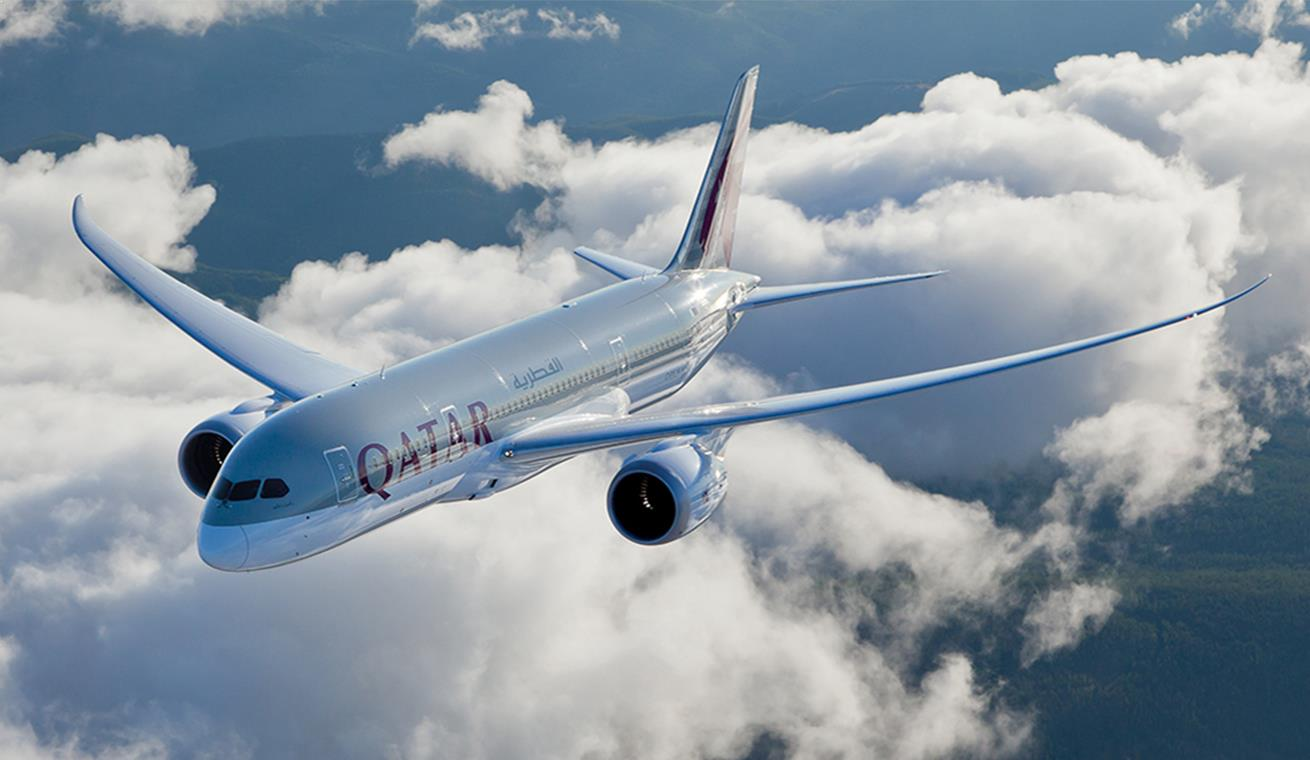

- Importing all the required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [2]:
data=pd.read_csv(r'Data\savedi.csv')
data.shape

(394, 2)

In [3]:
WINDOW_SIZE = 14

- Creating the 'Date' as Index for data and viewing the dataset

In [4]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
data=data.set_index(['date'])
print(data.head())
print(data.tail())

            weight
date              
2020-02-01    8262
2020-02-02    7878
2020-02-03    9113
2020-02-04    7854
2020-02-05    8675
            weight
date              
2021-02-24    8010
2021-02-25    7613
2021-02-26    7317
2021-02-27   11608
2021-02-28   10119


- Visualizing the Time Series plot for the number of Air Passengers 

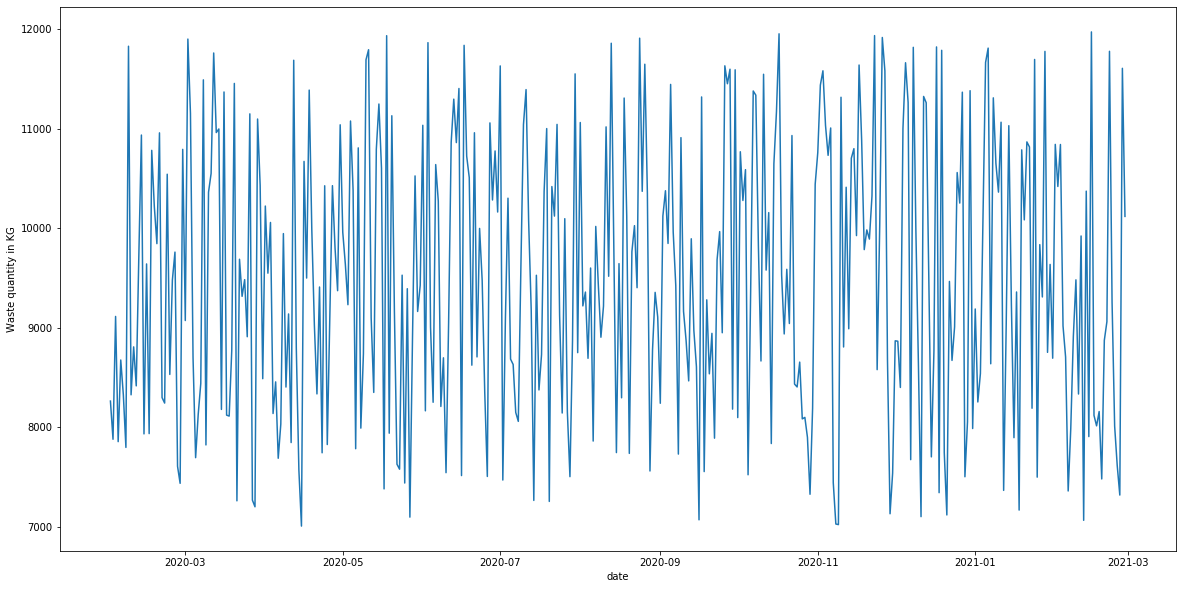

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Waste quantity in KG")
plt.plot(data)

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [6]:
rolmean=data.rolling(window=WINDOW_SIZE).mean()
rolstd=data.rolling(window=WINDOW_SIZE).std()
print(rolmean.head(15))
print(rolstd.head(15))

                 weight
date                   
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
2020-02-05          NaN
2020-02-06          NaN
2020-02-07          NaN
2020-02-08          NaN
2020-02-09          NaN
2020-02-10          NaN
2020-02-11          NaN
2020-02-12          NaN
2020-02-13          NaN
2020-02-14  8847.785714
2020-02-15  8946.285714
                 weight
date                   
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
2020-02-05          NaN
2020-02-06          NaN
2020-02-07          NaN
2020-02-08          NaN
2020-02-09          NaN
2020-02-10          NaN
2020-02-11          NaN
2020-02-12          NaN
2020-02-13          NaN
2020-02-14  1211.112469
2020-02-15  1215.873439


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

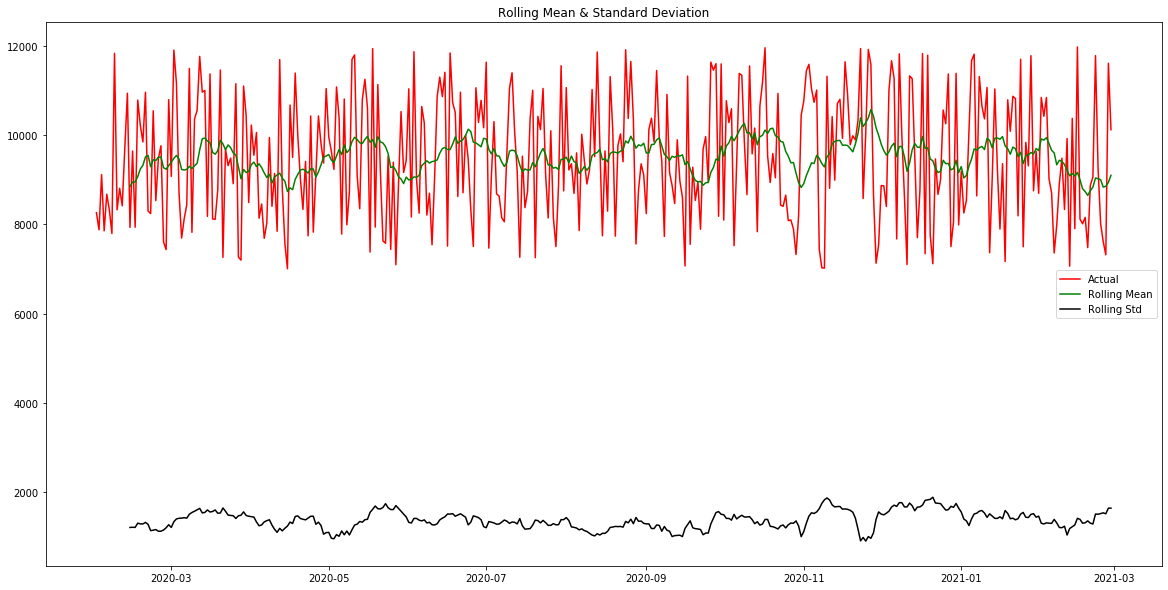

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['weight'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic         -8.866003e+00
p-value                 1.439911e-14
Lags Used               6.000000e+00
No. of Obs              3.870000e+02
Critical Value (1%)    -3.447361e+00
Critical Value (5%)    -2.869037e+00
Critical Value (10%)   -2.570764e+00
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

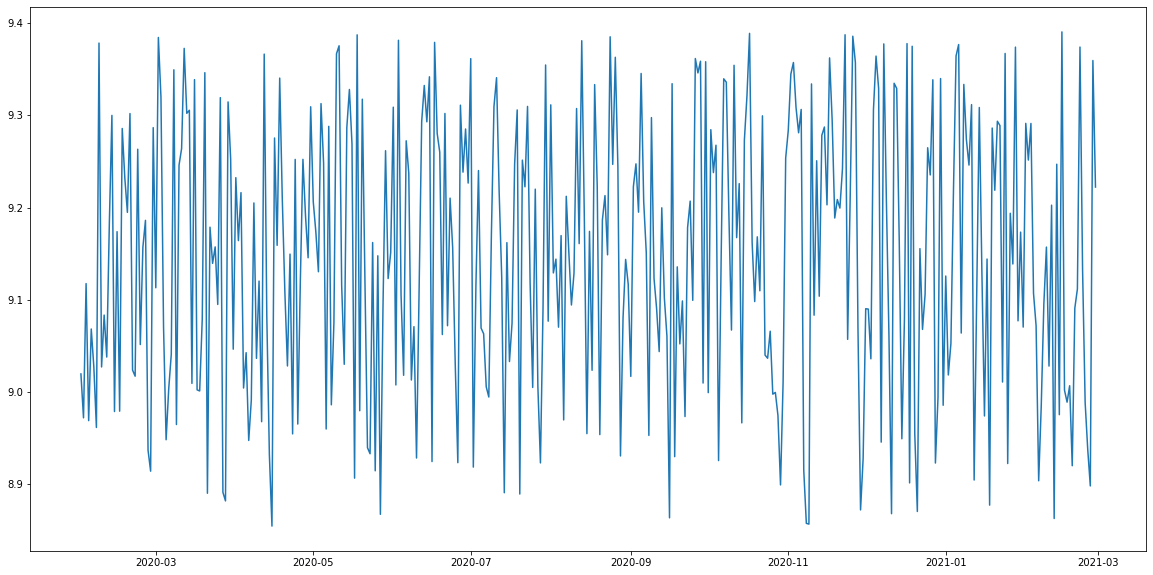

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

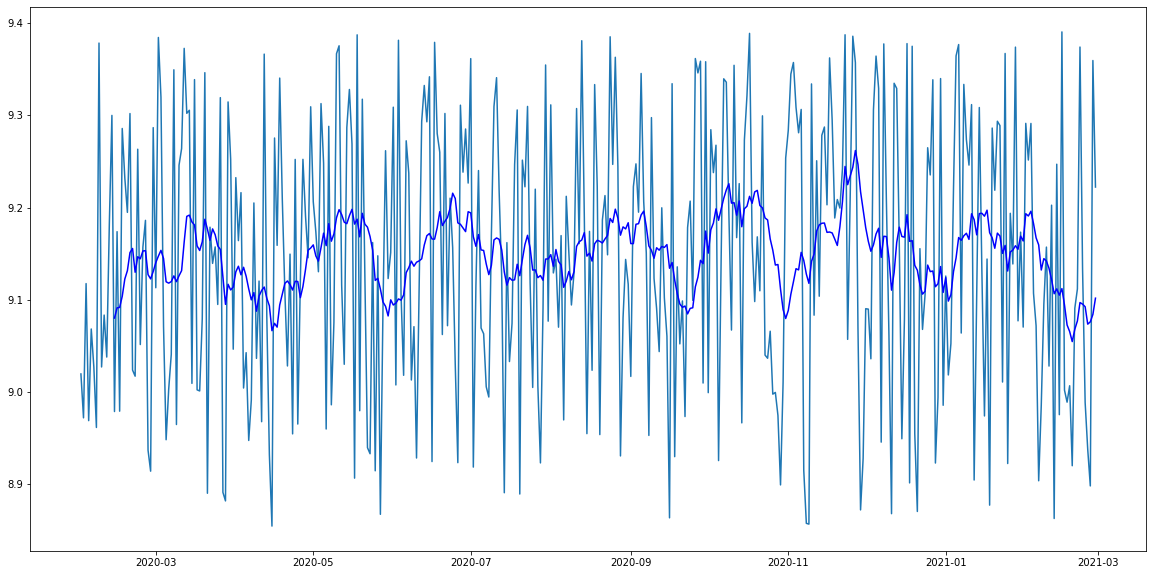

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=WINDOW_SIZE).mean()
MStd=data_log.rolling(window=WINDOW_SIZE).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

- Using another method differencing, to make our time series stationary

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

weight
date              
2020-02-01     NaN
2020-02-02     NaN
2020-02-03     NaN
2020-02-04     NaN
2020-02-05     NaN
2020-02-06     NaN
2020-02-07     NaN
2020-02-08     NaN
2020-02-09     NaN
2020-02-10     NaN
2020-02-11     NaN
2020-02-12     NaN

- Output of differencing method, after dropping null values

In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

weight
date                
2020-02-14 -0.101417
2020-02-15  0.082677
2020-02-16 -0.112579
2020-02-17  0.182089
2020-02-18  0.109565

- Defining function for Rolling Mean and Standard Deviation & ADF test

In [13]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['weight'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

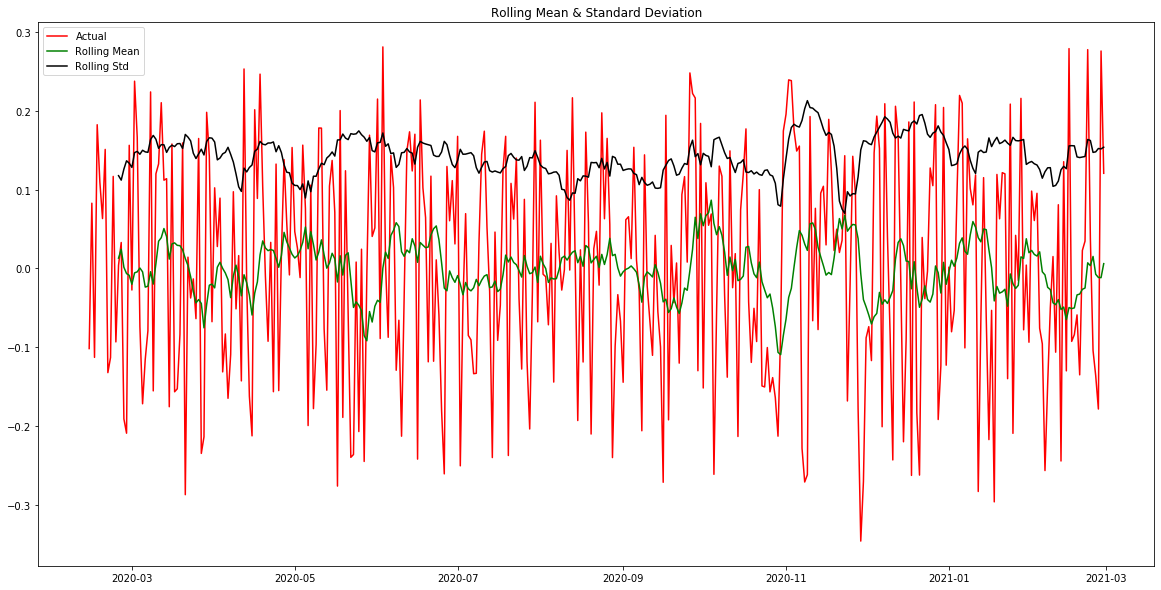

Dickey-Fuller Test: 
Test Statistic         -9.369983e+00
p-value                 7.422190e-16
Lags Used               6.000000e+00
No. of Obs              3.740000e+02
Critical Value (1%)    -3.447956e+00
Critical Value (5%)    -2.869299e+00
Critical Value (10%)   -2.570903e+00
dtype: float64


In [14]:
stationarity(data_log_diff)

- Checking for Trend stationarity and performing exponential transformation on our data

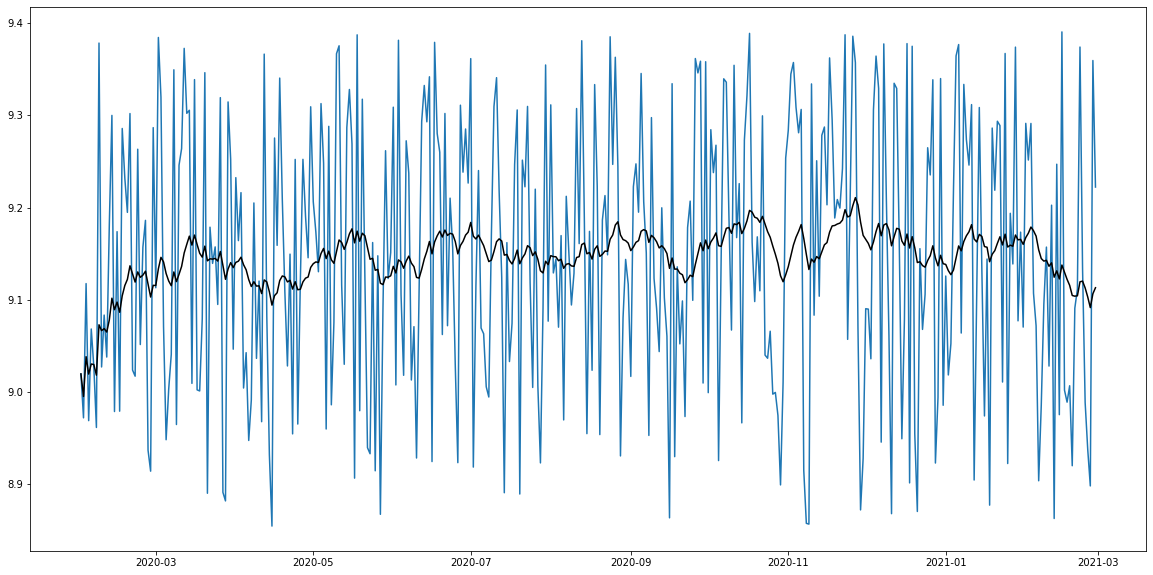

In [15]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

- Since log transformation is non-stationary, applying differencing on our data.

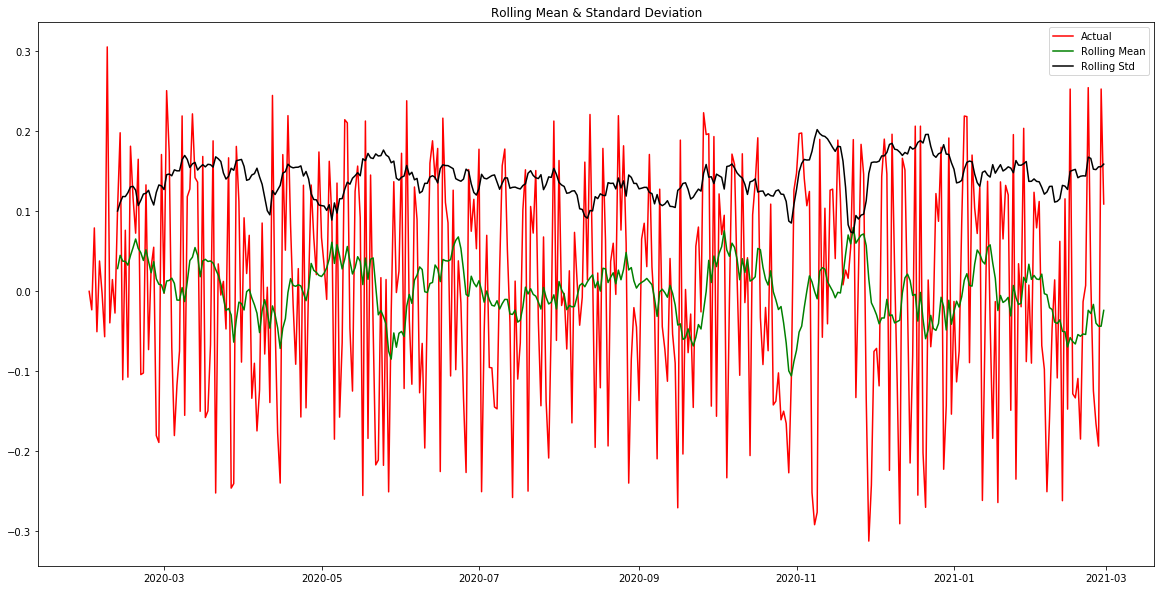

Dickey-Fuller Test: 
Test Statistic         -9.150352e+00
p-value                 2.697041e-15
Lags Used               6.000000e+00
No. of Obs              3.870000e+02
Critical Value (1%)    -3.447361e+00
Critical Value (5%)    -2.869037e+00
Critical Value (10%)   -2.570764e+00
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

- From above graph and ADF test, we conclude, it is trend stationary

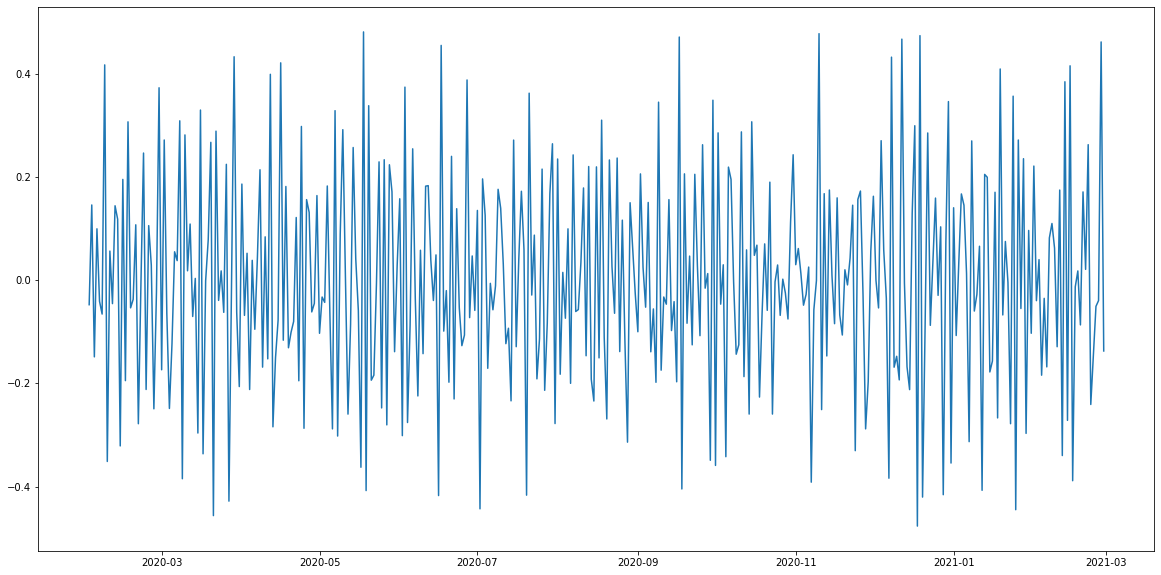

In [17]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

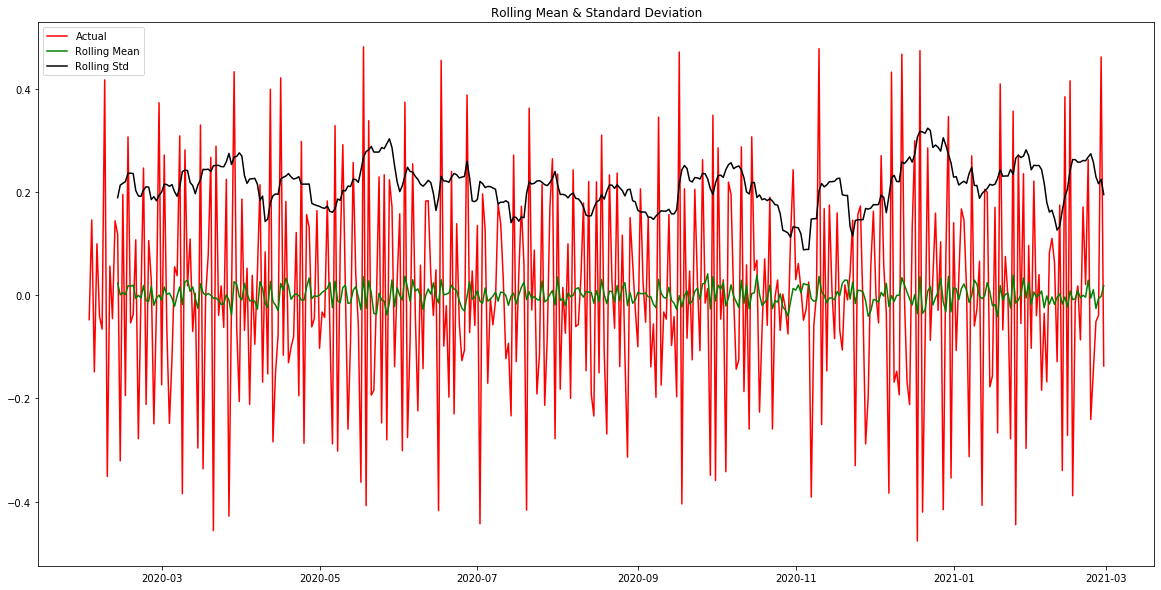

Dickey-Fuller Test: 
Test Statistic         -1.066058e+01
p-value                 4.417913e-19
Lags Used               1.200000e+01
No. of Obs              3.800000e+02
Critical Value (1%)    -3.447676e+00
Critical Value (5%)    -2.869176e+00
Critical Value (10%)   -2.570838e+00
dtype: float64


In [18]:
data_shift=data_shift.dropna()
stationarity(data_shift)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

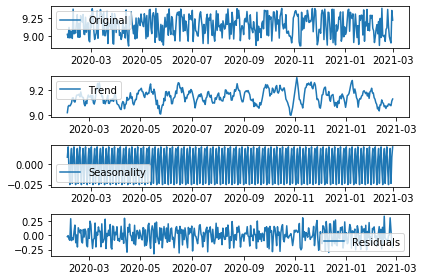

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Checking the stationarity of Time Series components

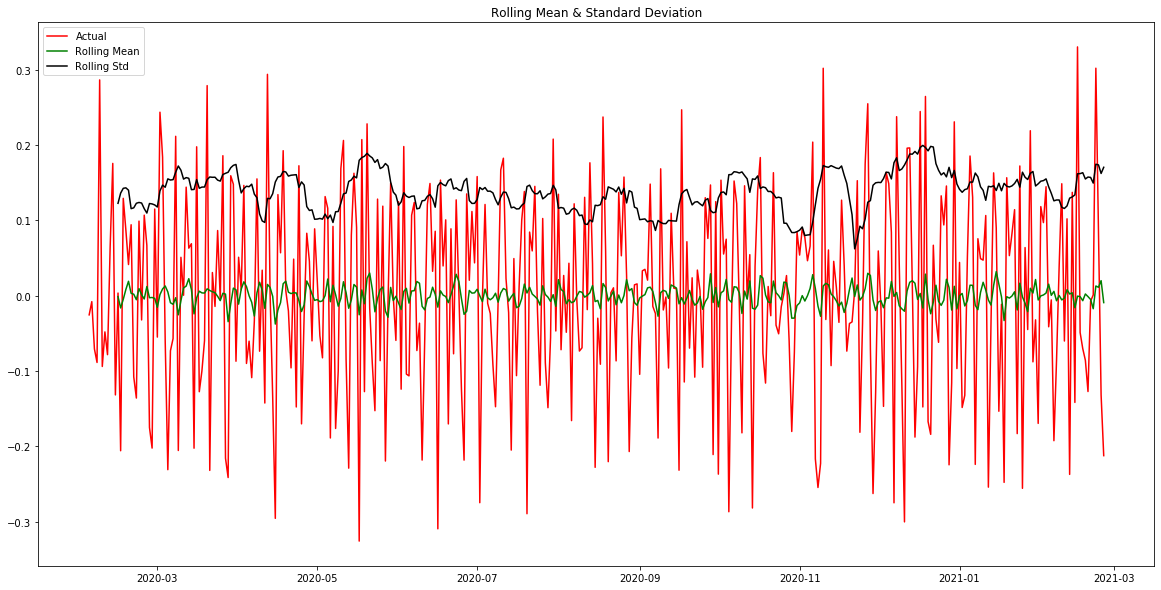

Dickey-Fuller Test: 
Test Statistic         -9.888074e+00
p-value                 3.619047e-17
Lags Used               1.600000e+01
No. of Obs              3.710000e+02
Critical Value (1%)    -3.448100e+00
Critical Value (5%)    -2.869362e+00
Critical Value (10%)   -2.570937e+00
dtype: float64


In [20]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

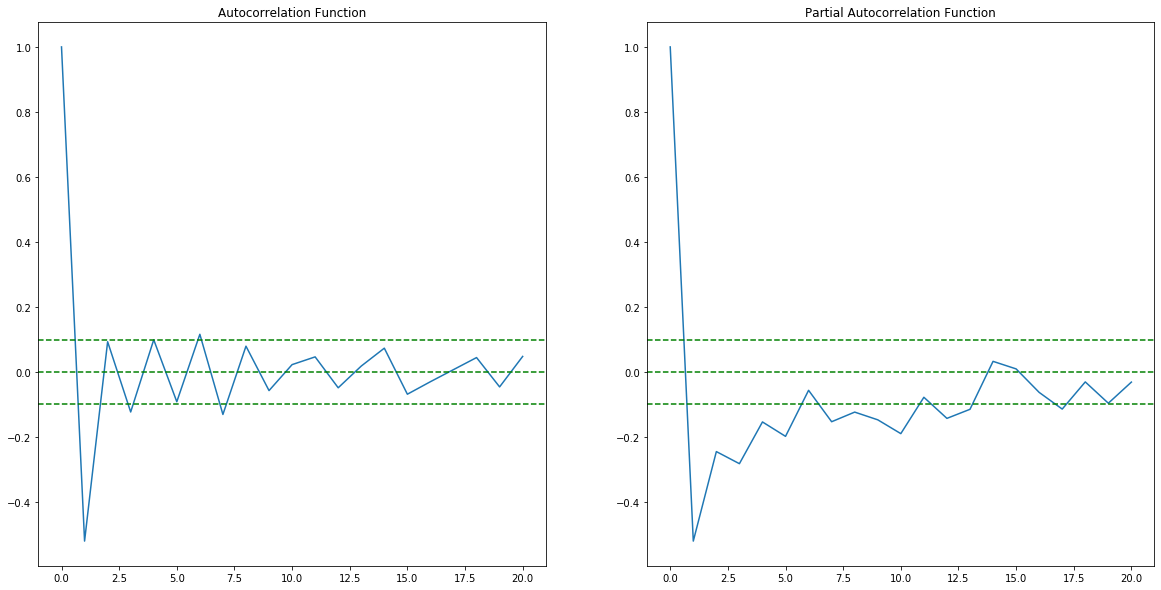

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


plotting ARIMA model


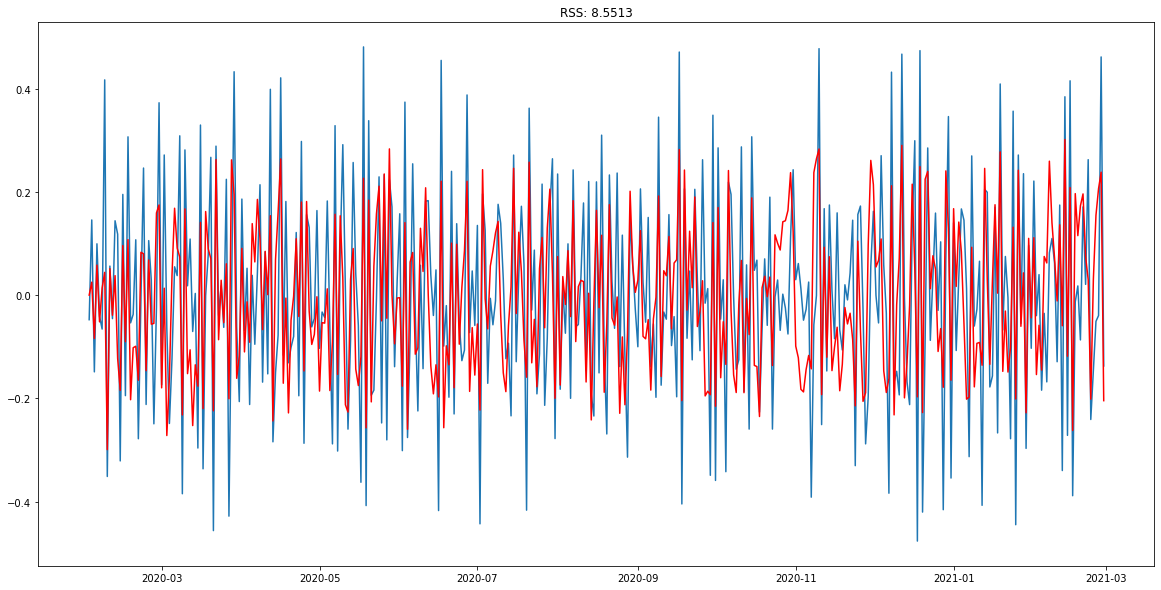

In [22]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['weight'])**2))
print('plotting ARIMA model')

- Predicted values from ARIMA model in difference form

In [23]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

date
2020-02-02    0.000046
2020-02-03    0.025097
2020-02-04   -0.083869
2020-02-05    0.058087
2020-02-06   -0.051791
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [24]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

date
2020-02-02    0.000046
2020-02-03    0.025144
2020-02-04   -0.058725
2020-02-05   -0.000638
2020-02-06   -0.052429
dtype: float64


- Below is data display of predicted value in log scale

In [25]:
predictions_log=pd.Series(data_log['weight'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

date
2020-02-01    9.019422
2020-02-02    9.019468
2020-02-03    9.044566
2020-02-04    8.960697
2020-02-05    9.018784
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

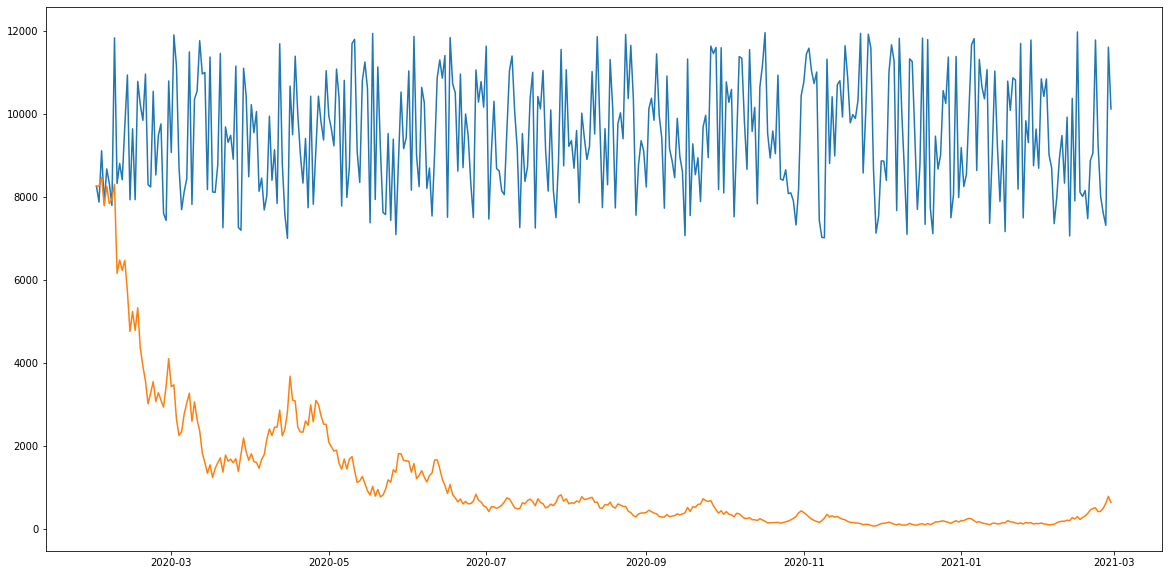

In [26]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

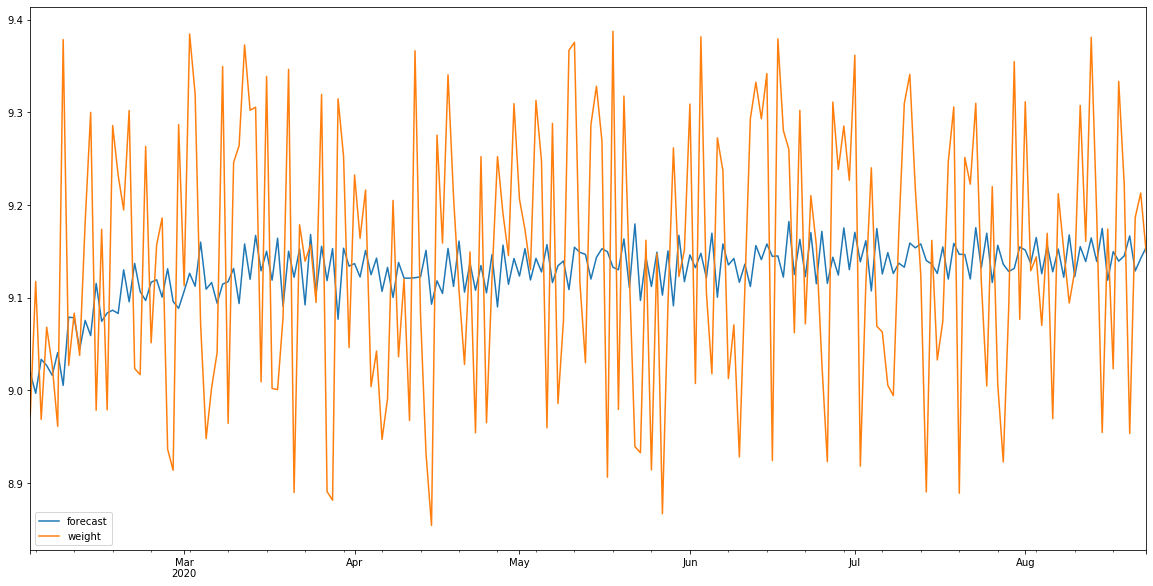

In [27]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [28]:
x[0]

array([9.17773967, 9.14498177, 9.16648579, 9.14675596, 9.16421453,
       9.14884773, 9.16252862, 9.15051248, 9.16123002, 9.15183557,
       9.16023377, 9.1528912 , 9.15947414, 9.15373749, 9.15889971,
       9.15441994, 9.15847023, 9.15497416, 9.15815418, 9.15542802,
       9.15792693, 9.15580333, 9.15776916, 9.15611716, 9.15766578,
       9.15638289, 9.15760497, 9.15661095, 9.15757747, 9.15680954,
       9.15757604, 9.15698507, 9.15759502, 9.15714254, 9.15762997,
       9.15728589, 9.15767743, 9.15741817, 9.15773466, 9.1575418 ,
       9.15779955, 9.15765866, 9.15787043, 9.15777021, 9.15794601,
       9.15787762, 9.15802525, 9.15798178, 9.15810737, 9.15808339,
       9.15819174, 9.15818302, 9.15827786, 9.15828109, 9.15836537,
       9.15837794, 9.15845395, 9.15847384, 9.15854338, 9.15856899,
       9.15863346, 9.15866356, 9.15872406, 9.15875767, 9.15881507,
       9.15885142, 9.15890639, 9.15894489, 9.15899797, 9.15903814,
       9.15908973, 9.15913122, 9.15918165, 9.15922417, 9.15927

- Actual predicted value for next 10 years, after taking out log transformation

In [29]:
np.exp(x[0])

array([9679.24969027, 9367.31486062, 9570.93123242, 9383.94902587,
       9549.21785459, 9403.59868694, 9533.13230356, 9419.26629057,
       9520.76058805, 9431.73715312, 9511.28022341, 9441.69880888,
       9504.05794806, 9449.69259478, 9498.60010784, 9456.14372821,
       9494.52149081, 9461.38595289, 9491.52130514, 9465.68106008,
       9489.36455581, 9469.23430501, 9487.86757686, 9472.20655751,
       9486.88677391, 9474.7238641 , 9486.30985324, 9476.88496416,
       9486.04898171, 9478.76719226, 9486.03544799, 9480.4311101 ,
       9486.21549316, 9481.92413921, 9486.54705292, 9483.28340894,
       9486.99721112, 9484.53798829, 9487.54020877, 9485.71063456,
       9488.15588685, 9486.81916311, 9488.82846838, 9487.87752007,
       9489.54560549, 9488.89662246, 9490.29763392, 9489.8850159 ,
       9491.07698967, 9490.84938966, 9491.87775245, 9491.79497983,
       9492.69528847, 9492.72588499, 9493.52597085, 9493.64531329,
       9494.36696077, 9494.5557759 , 9495.21603628, 9495.45923

<b>*************************End****************************</b>